<a href="https://colab.research.google.com/github/AnkitKumarjadon/Classsification_Project/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project**

# **Project - Mobile Price Range Prediction**

# **Business Context**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some reltaion between features of a mobile phone(eg:- RAM,internal Memory,etc) and its selling price.In this problem,we do not have to predict the actual price but a price range indicating how high the price is.

# **Import all Libraries**

In [ ]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

**Import DataSet**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pyth /data_mobile_price_range.csv')

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Check Information About Columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Check Null Values In DataSet**

In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


**Check Class Imbalance in PriceRange Column**

In [ ]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [ ]:
df['blue'].value_counts()

,count
blue,
0,1010
1,990


**Relationship Between PriceRange and BlueTooth Column**

<Axes: xlabel='price_range', ylabel='count'>

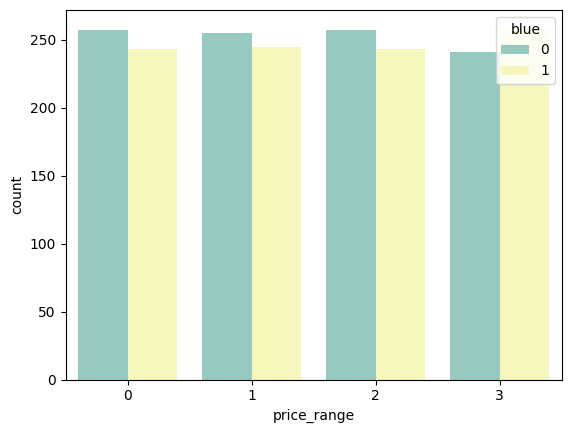

In [ ]:
sns.countplot(x=df['price_range'],hue=df['blue'],palette='Set3')

**Relationship Between PriceRange and BatteryPower**

<Axes: xlabel='price_range', ylabel='battery_power'>

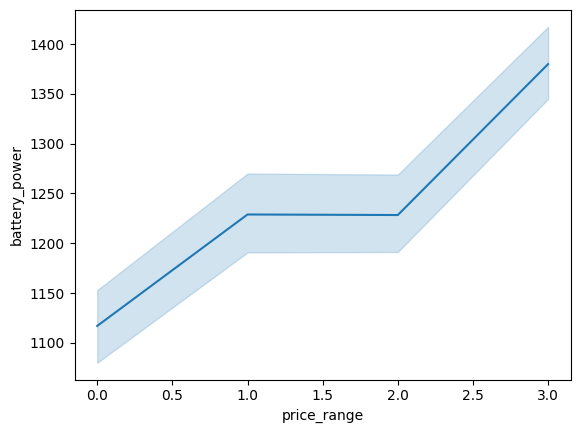

In [ ]:
sns.lineplot(x=df['price_range'],y=df['battery_power'])

**Relationship Between PriceRange and Dual Sim**

<Axes: xlabel='price_range', ylabel='count'>

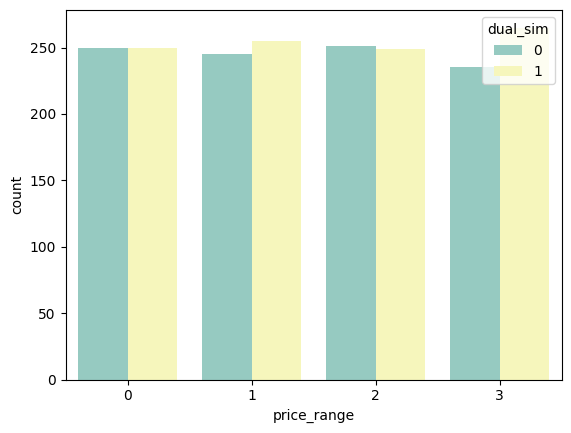

In [ ]:
sns.countplot(x=df['price_range'],hue=df['dual_sim'],palette='Set3')

**CountPlot Between PriceRange and FourG**

<Axes: xlabel='price_range', ylabel='count'>

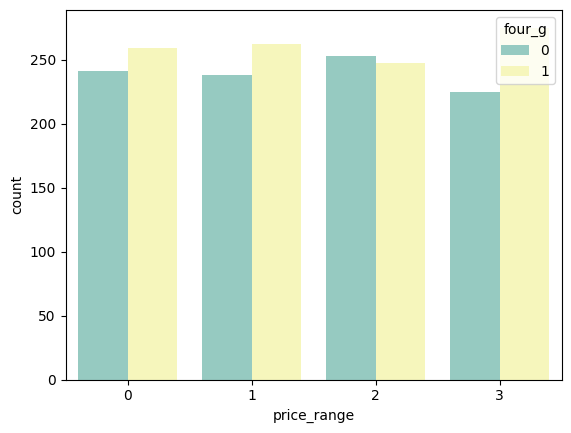

In [ ]:
sns.countplot(x=df['price_range'],hue=df['four_g'],palette='Set3')

**BarPlot Between PriceRange and BatteryPower**

<Axes: xlabel='price_range', ylabel='battery_power'>

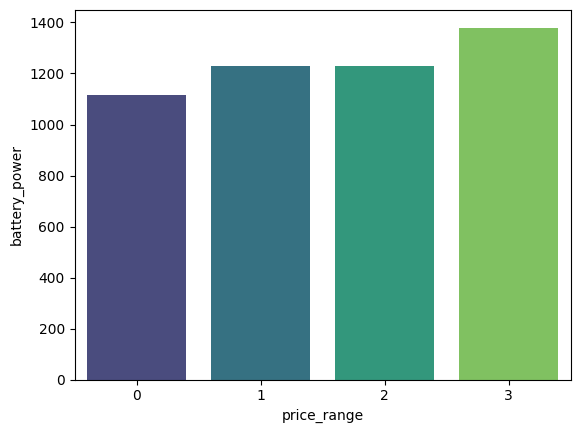

In [ ]:
sns.barplot(x=df['price_range'],y=df['battery_power'],palette='viridis',ci = None)

**BarPlot Between PriceRange and Fc**

<Axes: xlabel='price_range', ylabel='fc'>

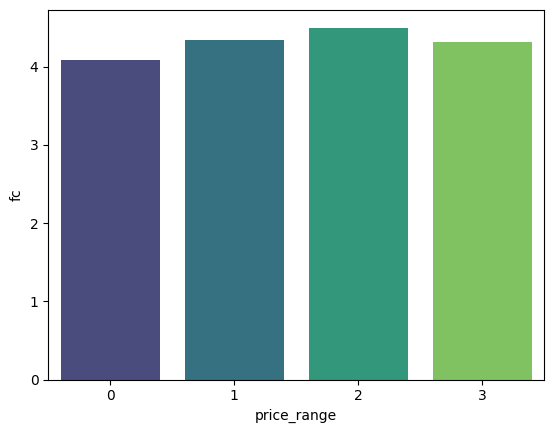

In [ ]:
sns.barplot(x=df['price_range'],y=df['fc'],palette='viridis',ci = None)

**Histogram Plot of All Columns**

In [ ]:
num_features = df.describe().columns
num_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

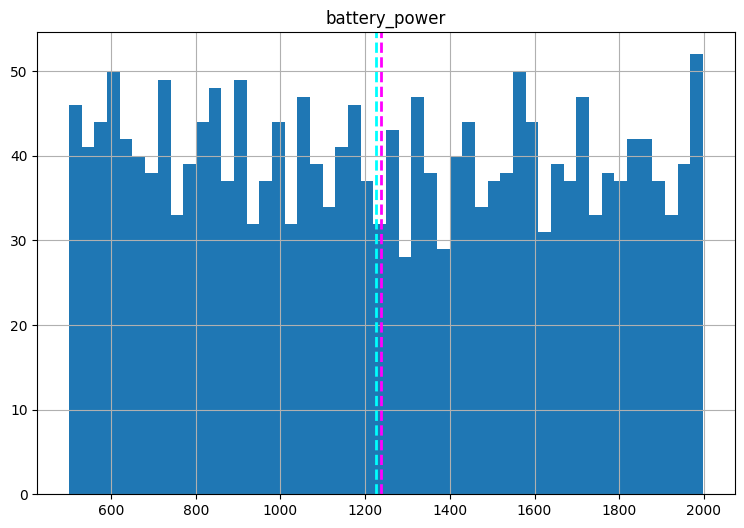

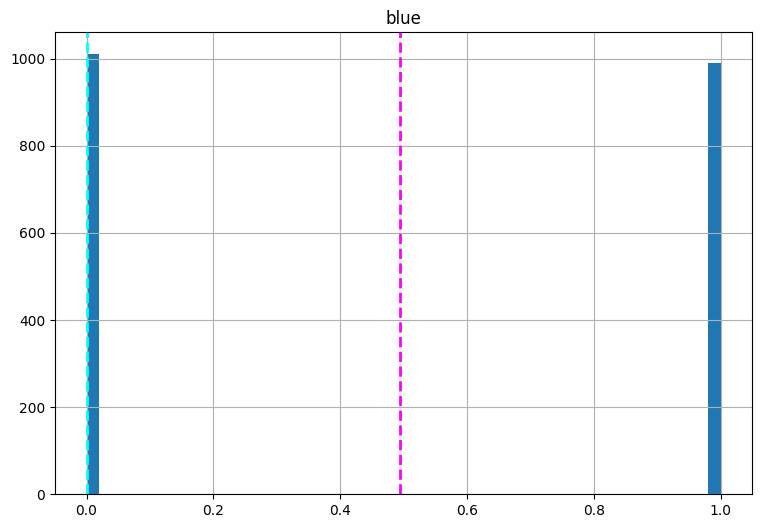

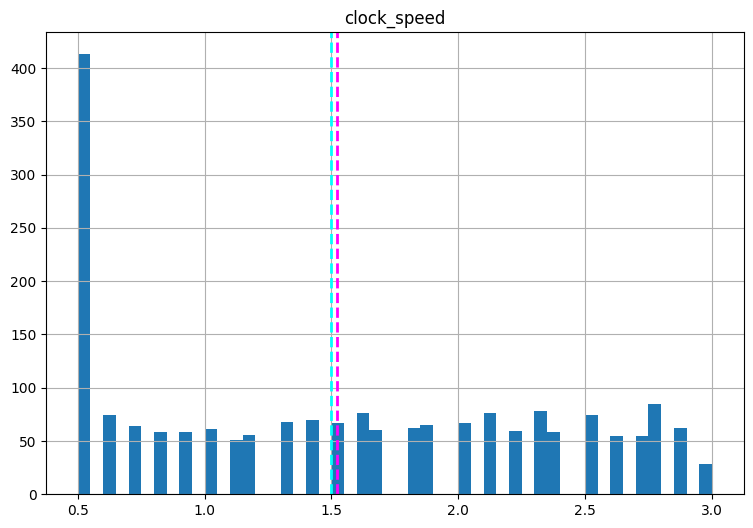

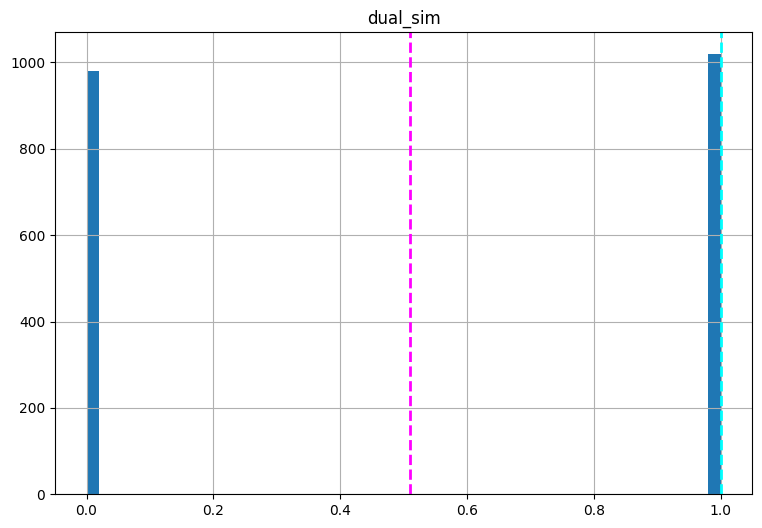

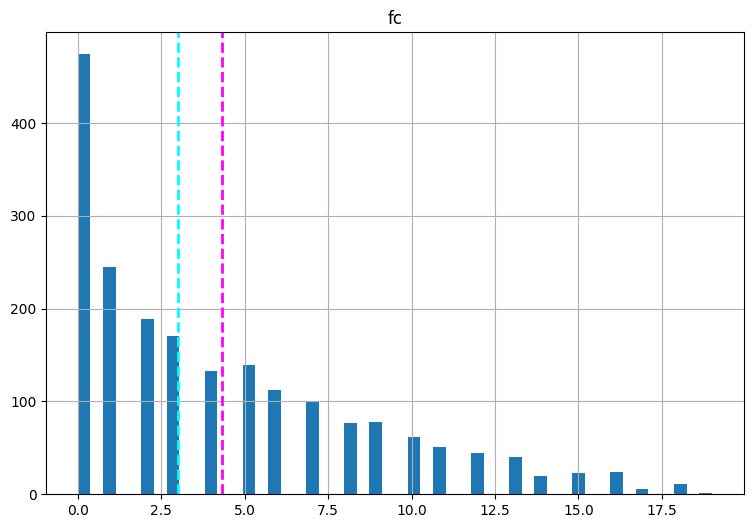

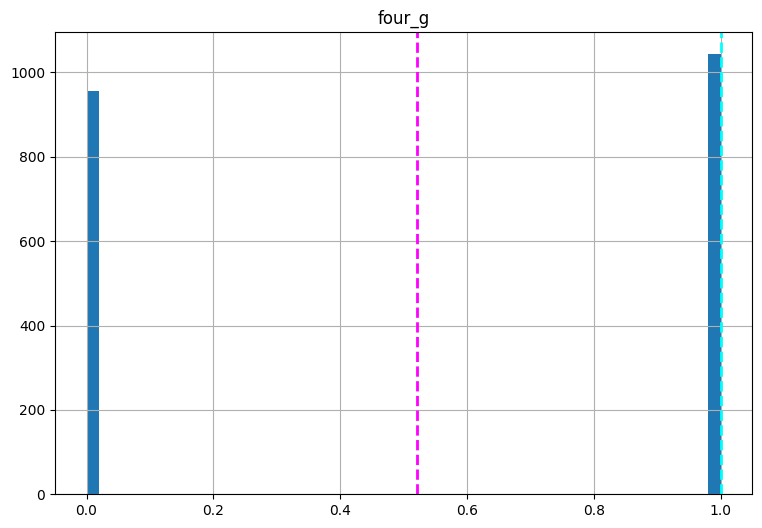

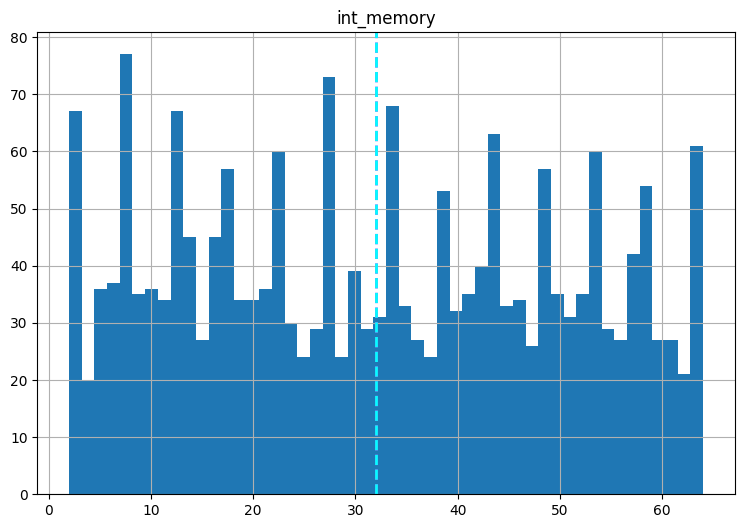

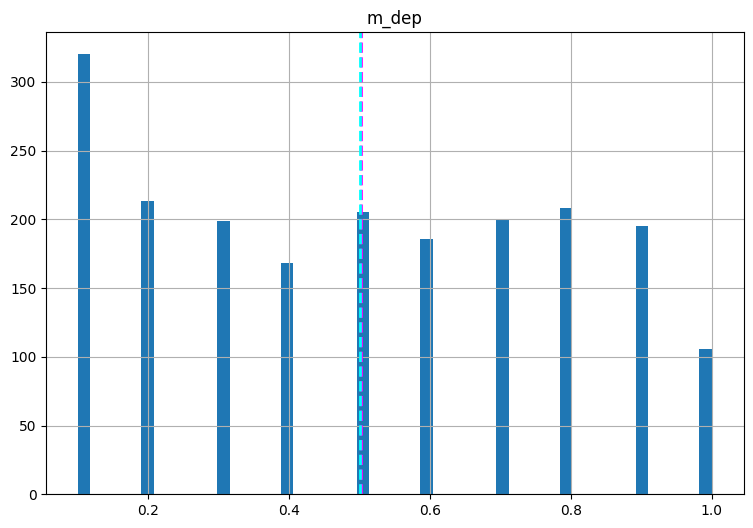

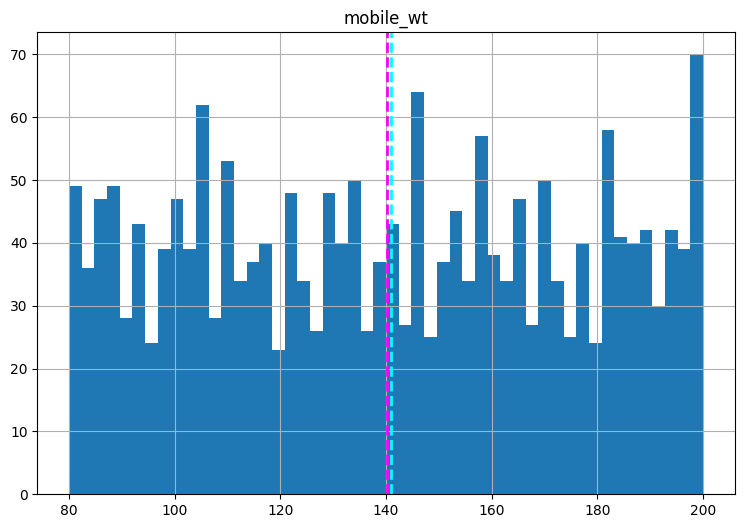

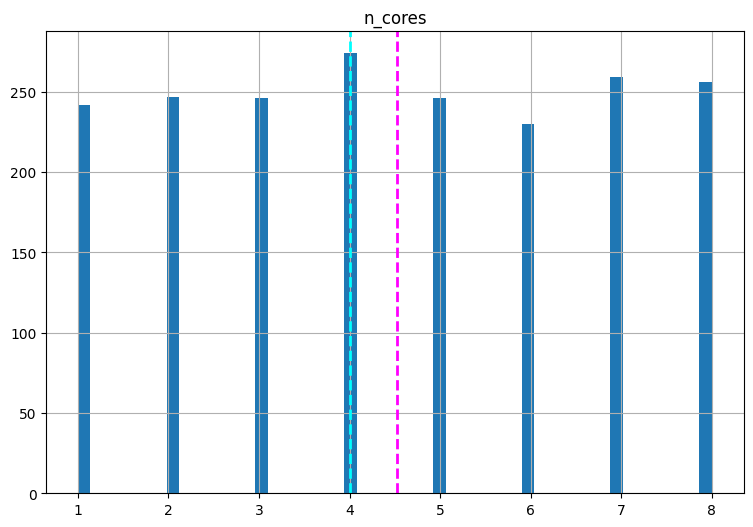

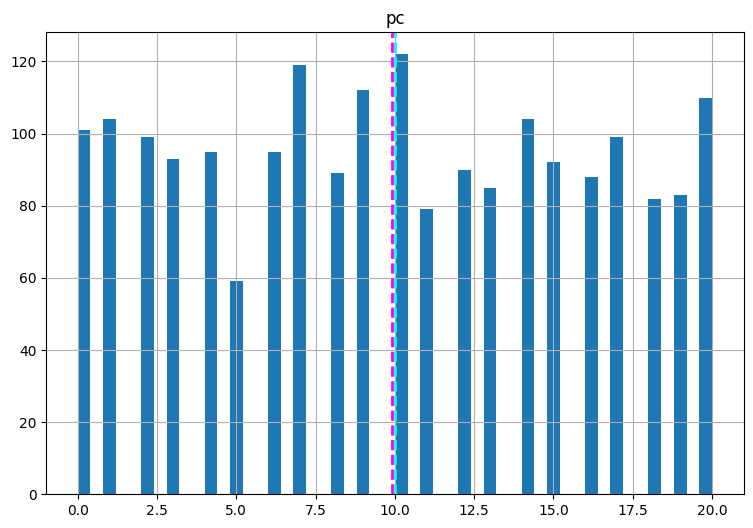

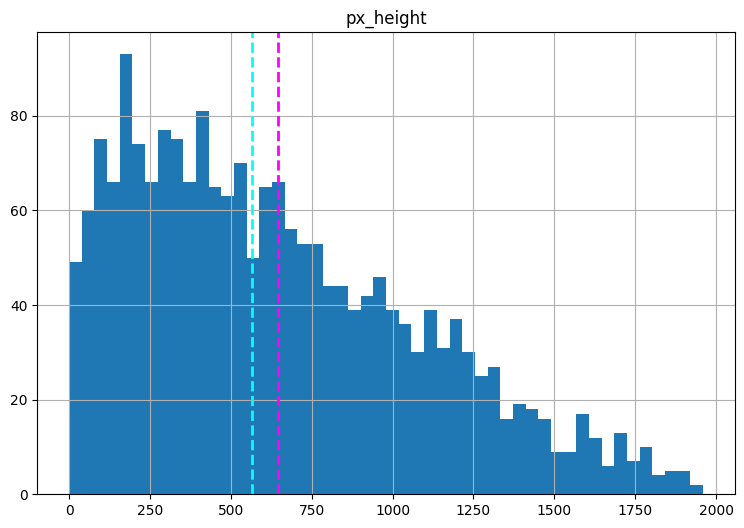

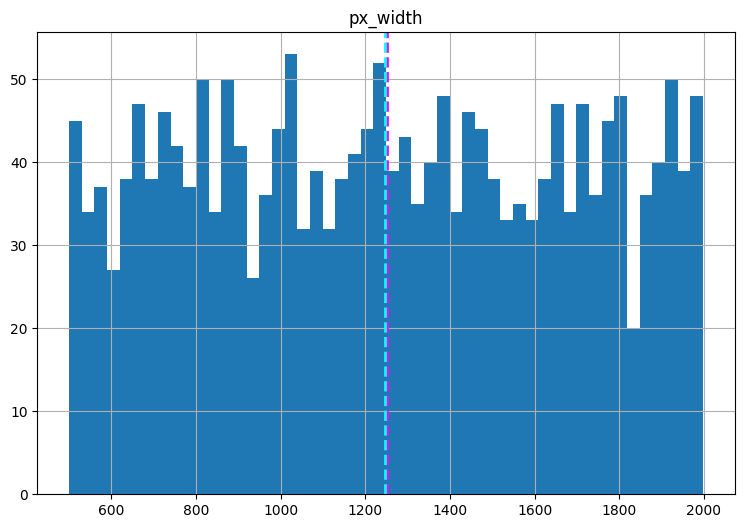

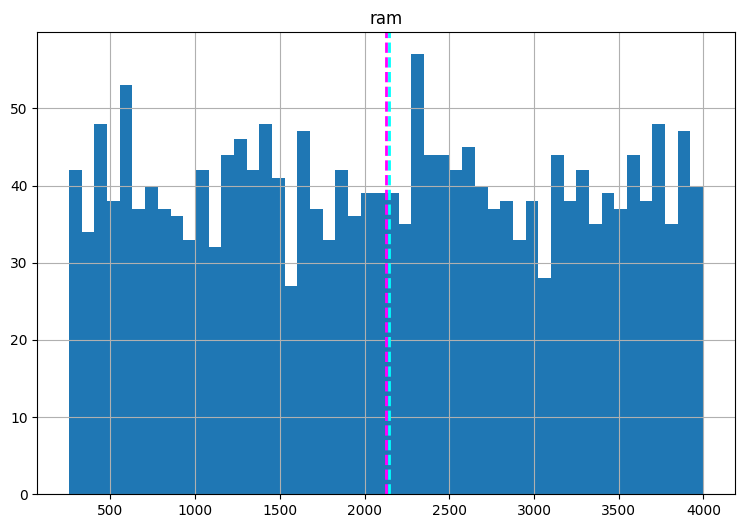

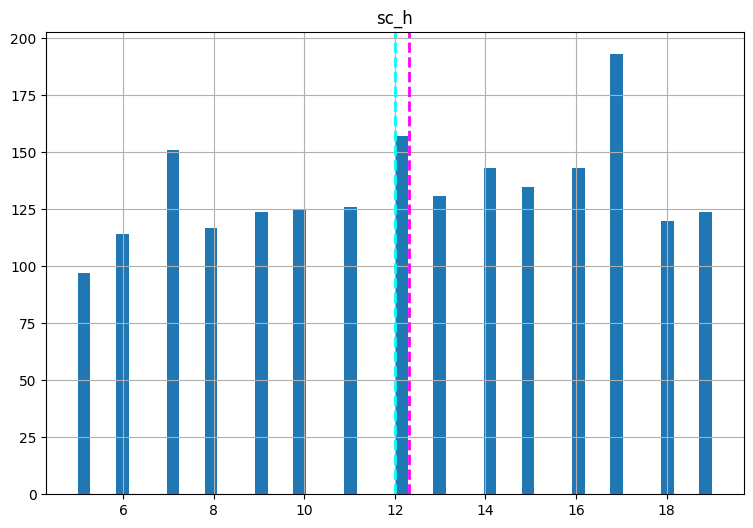

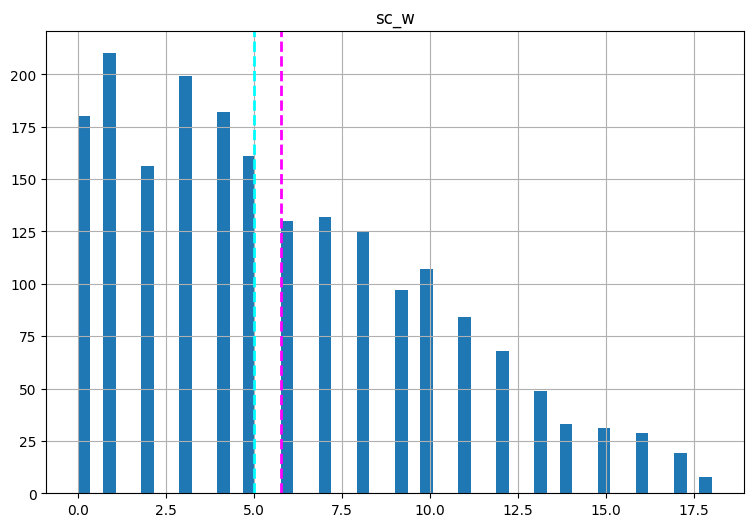

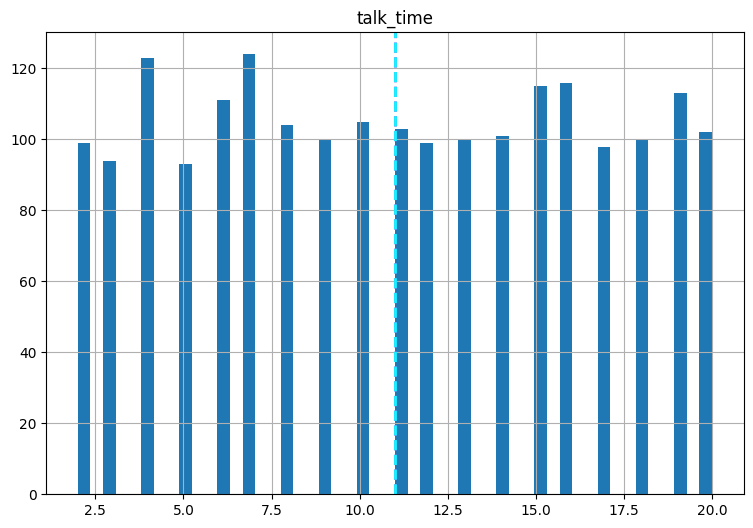

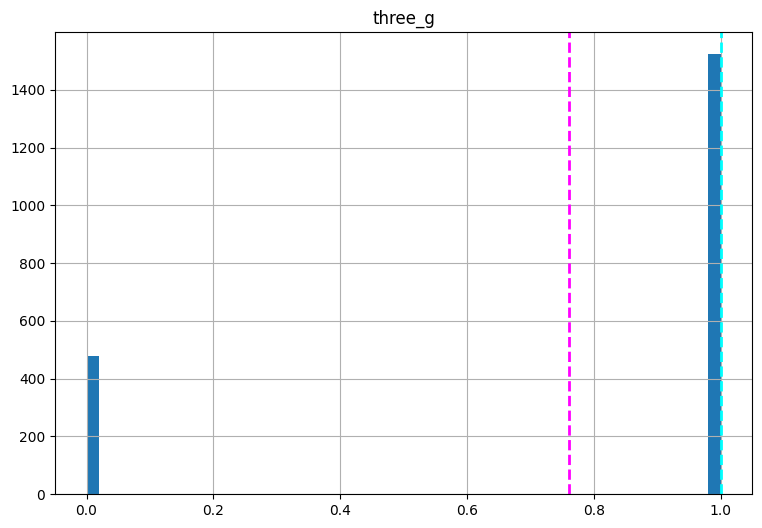

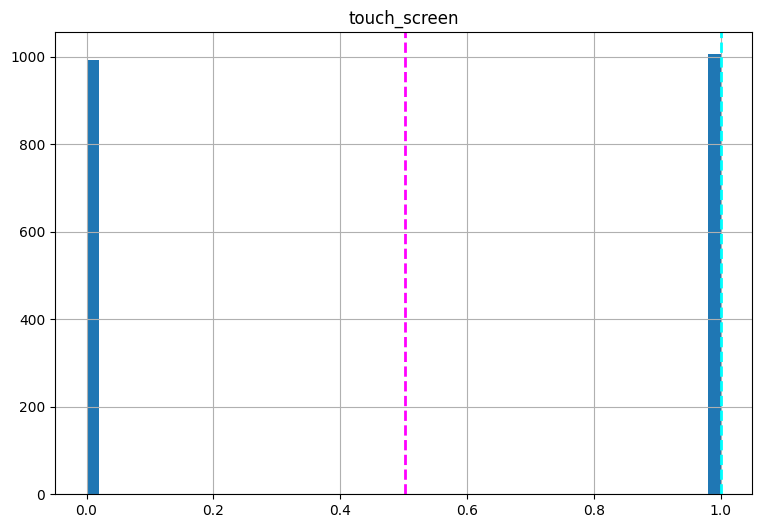

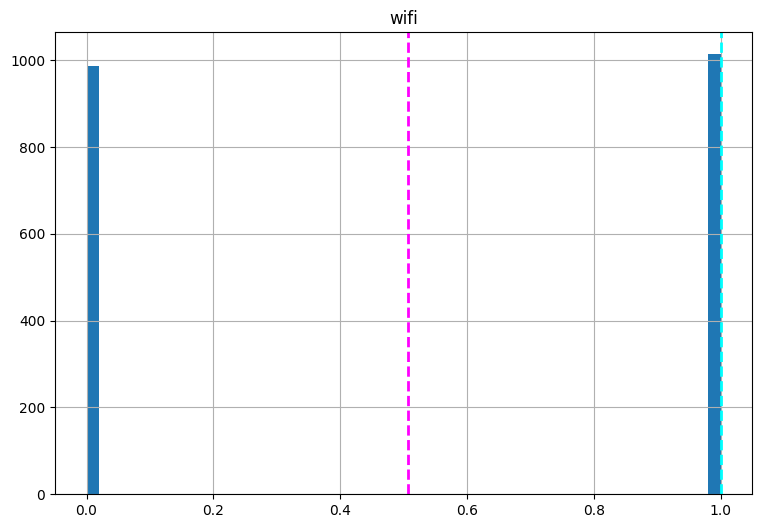

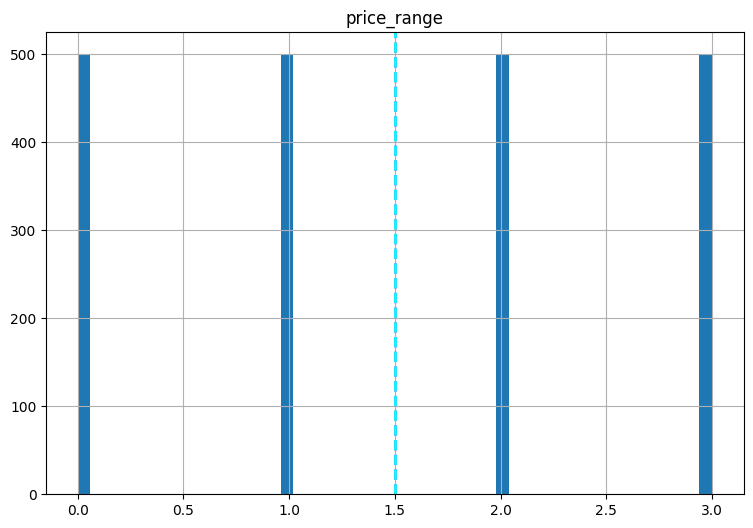

In [ ]:
for col in num_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(feature.median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(col)
plt.show()

**Correlation Between output Label and All Columns**

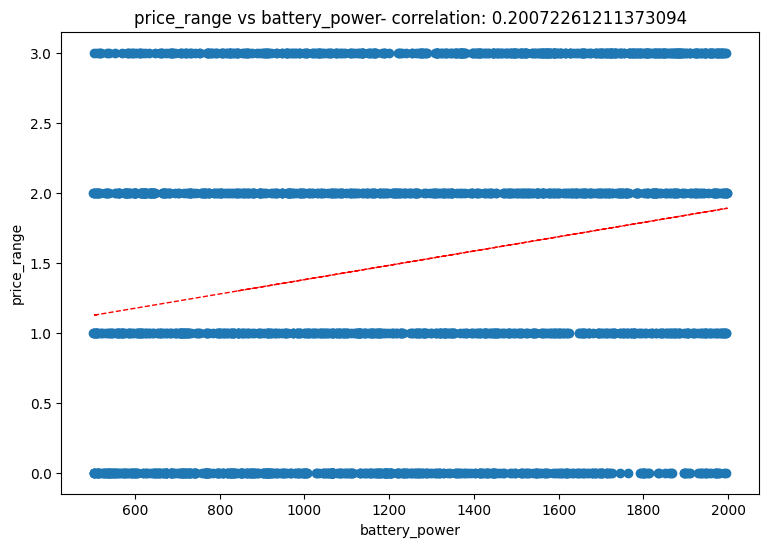

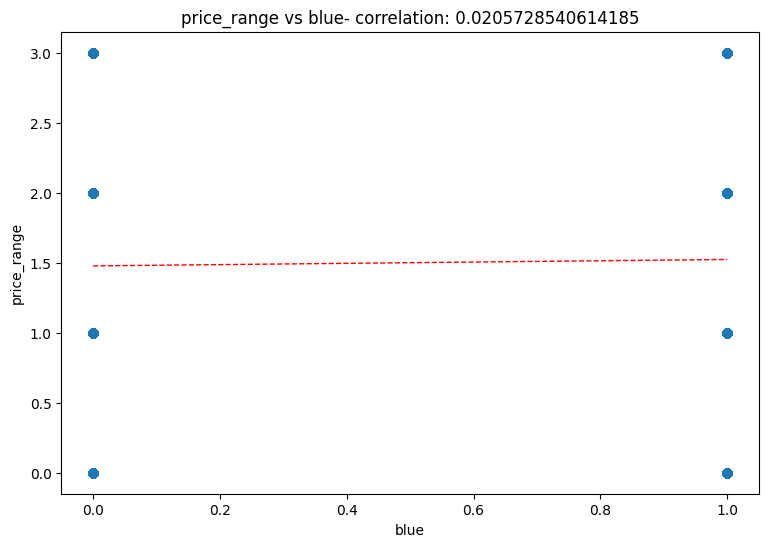

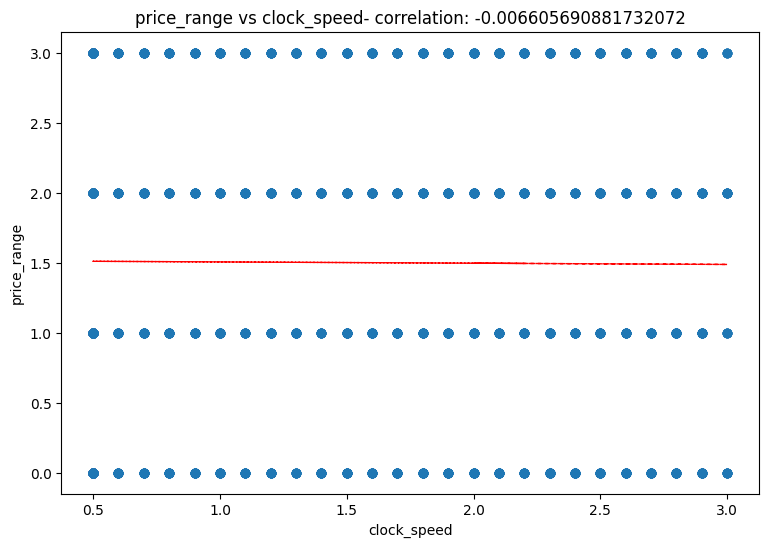

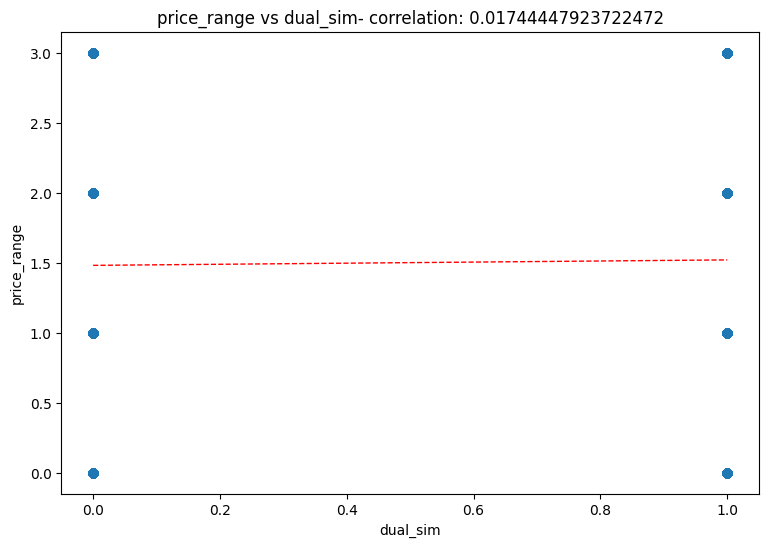

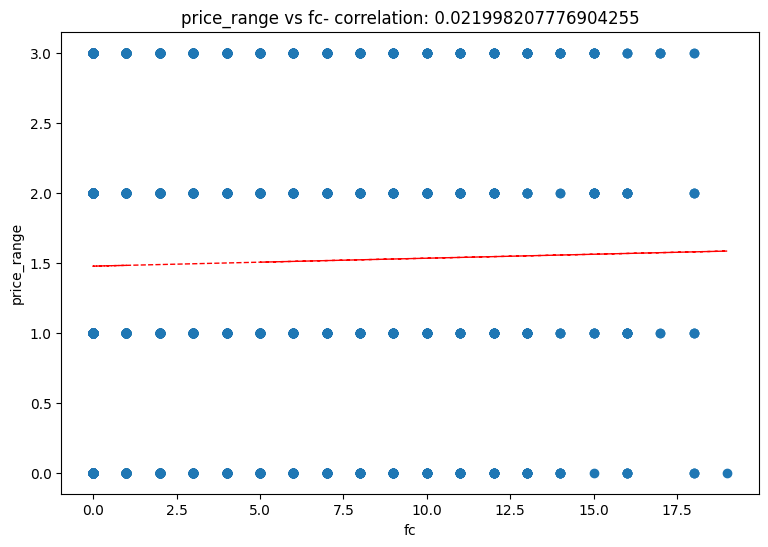

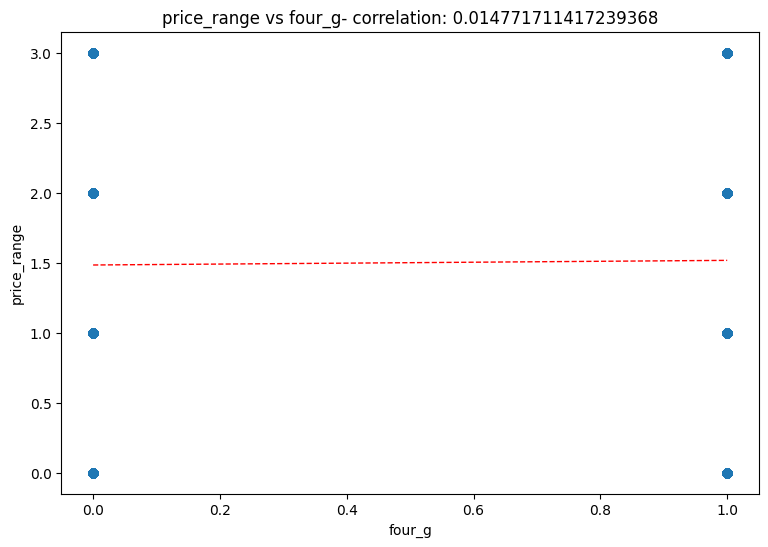

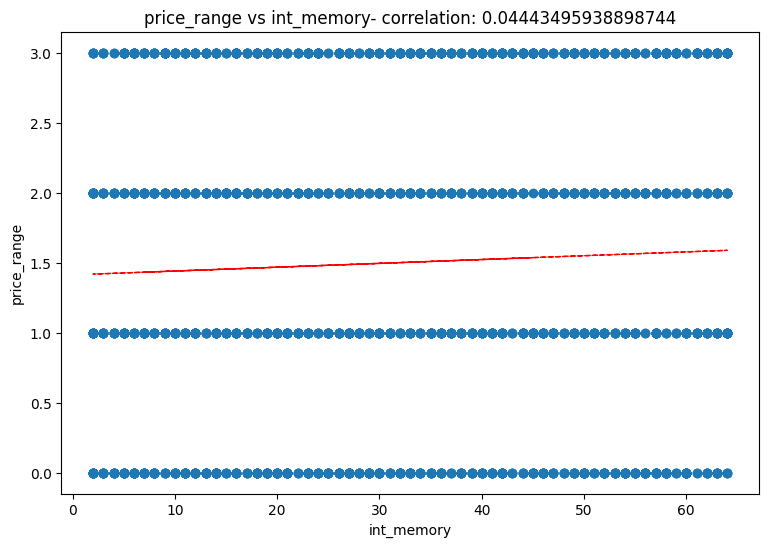

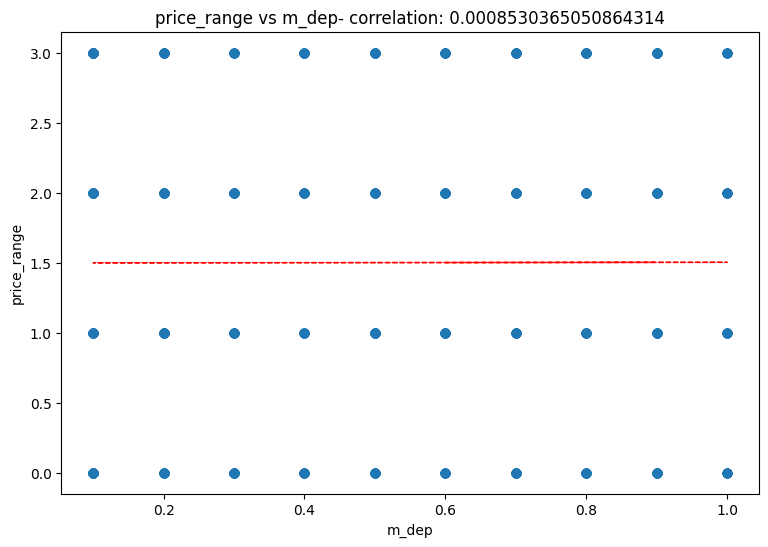

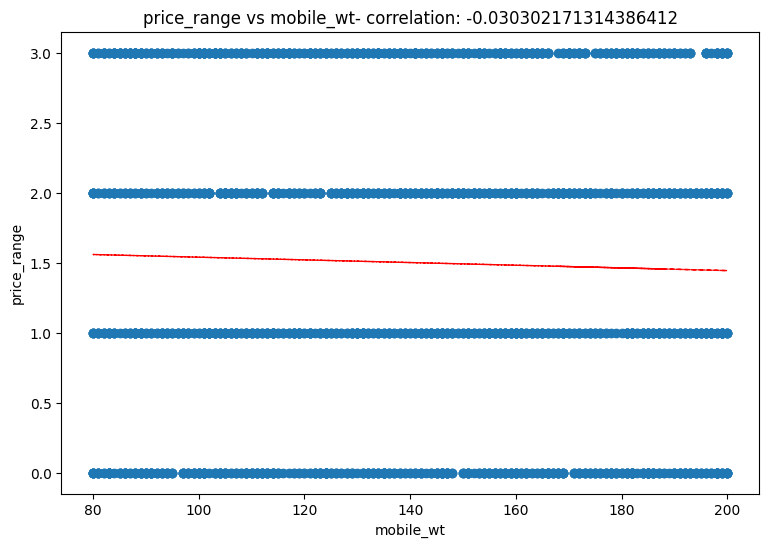

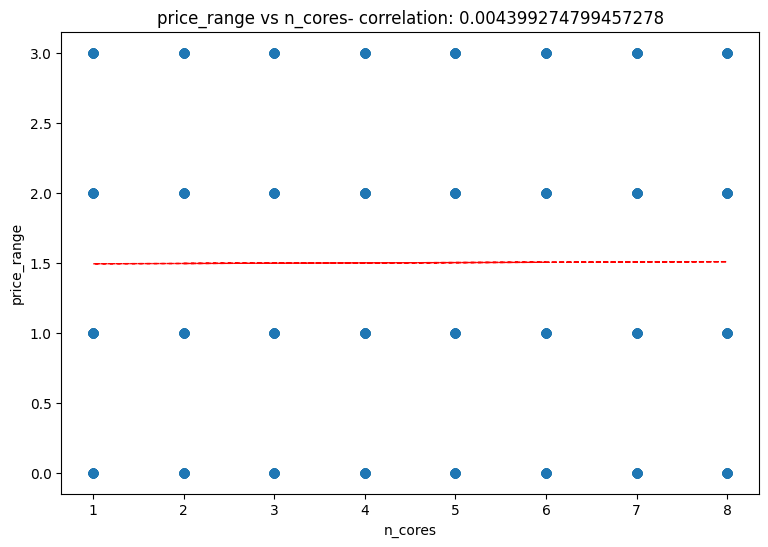

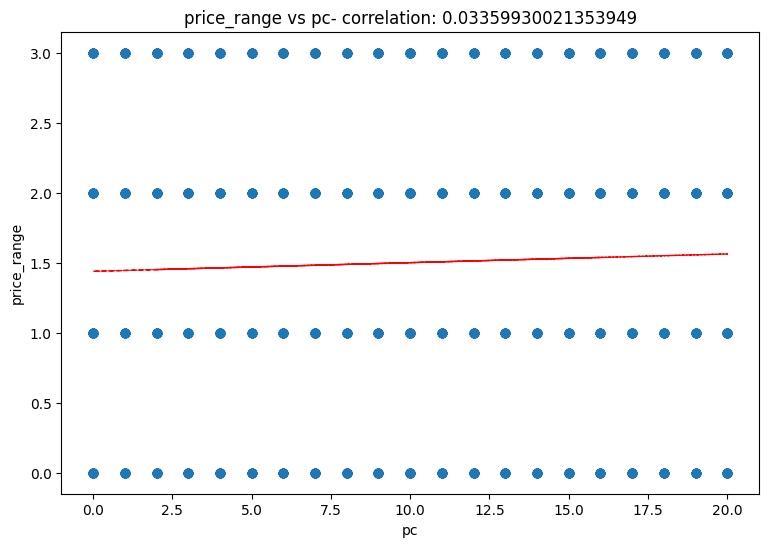

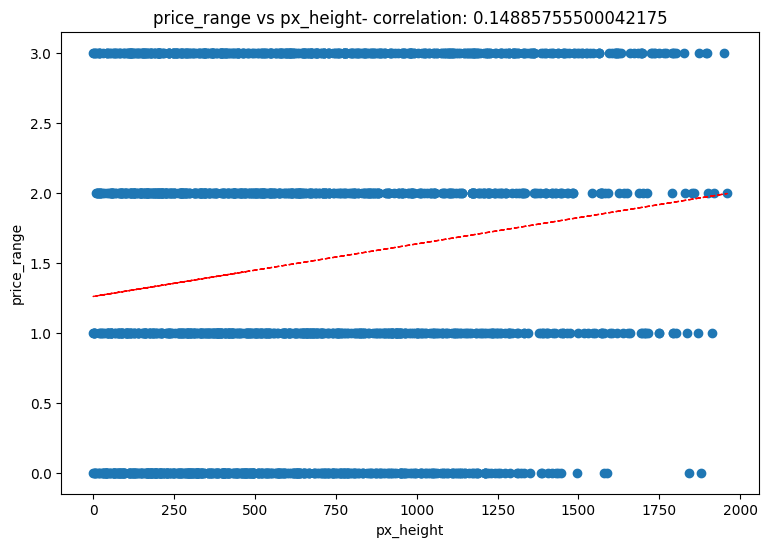

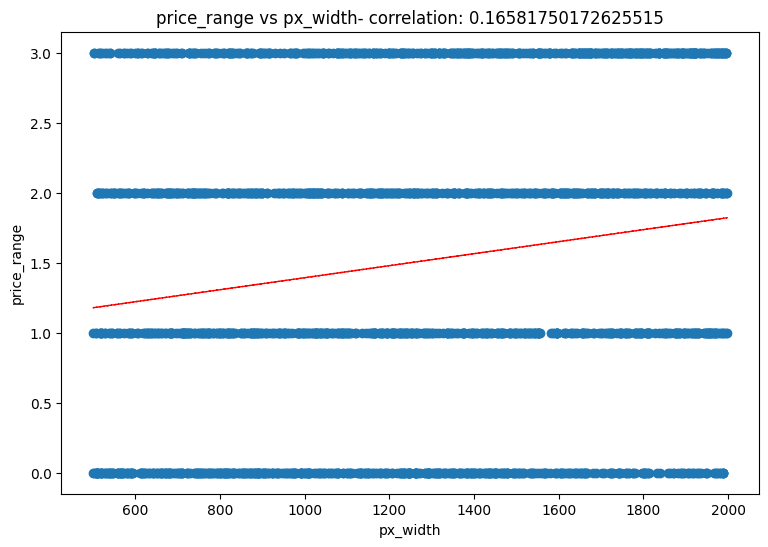

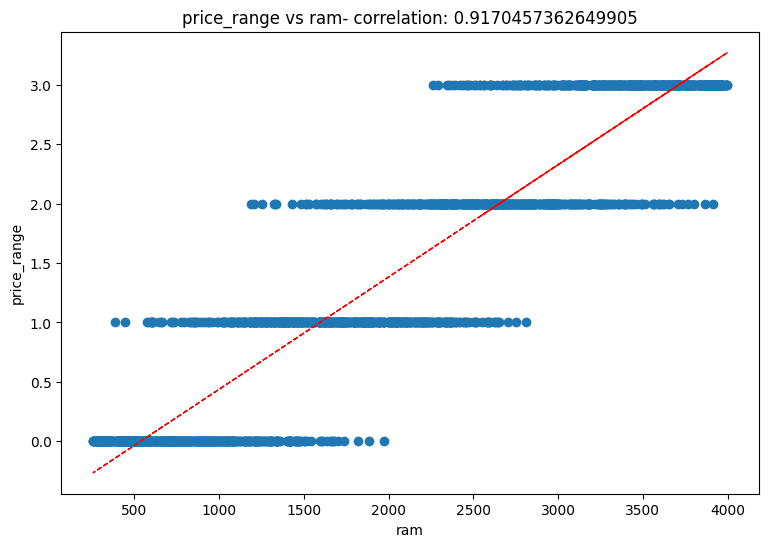

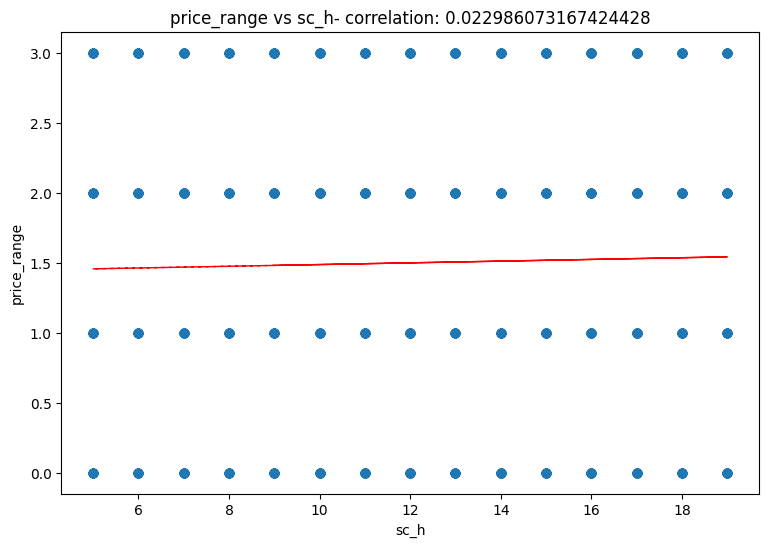

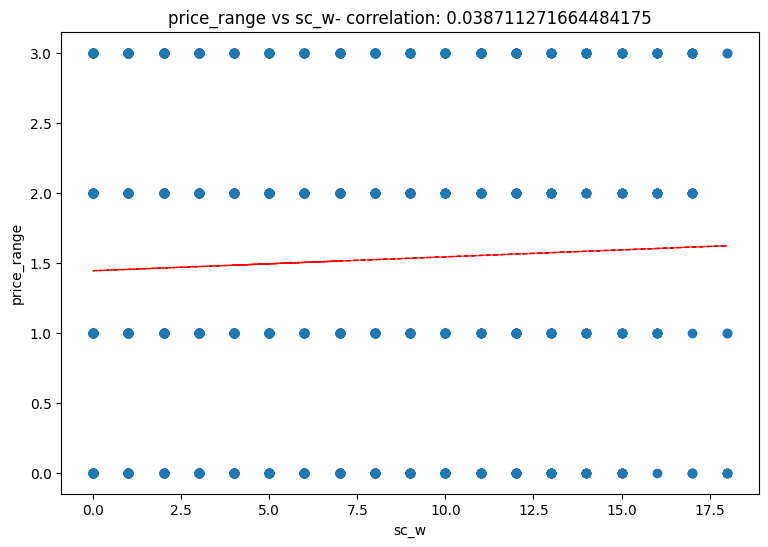

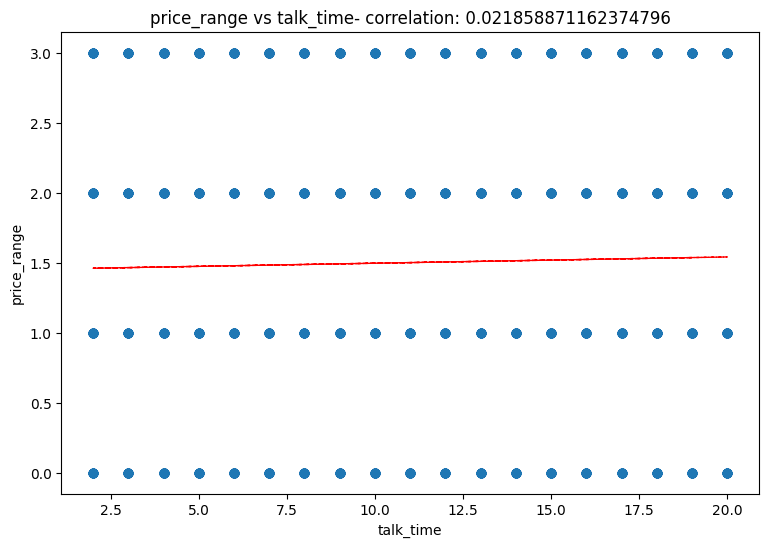

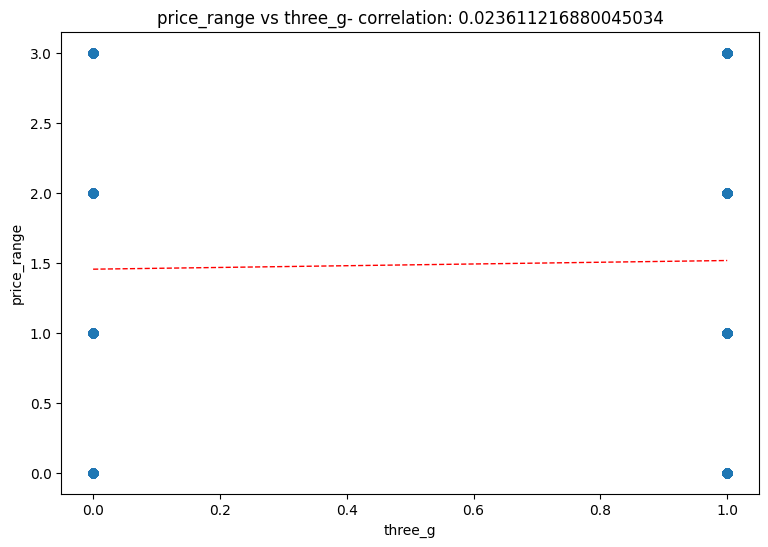

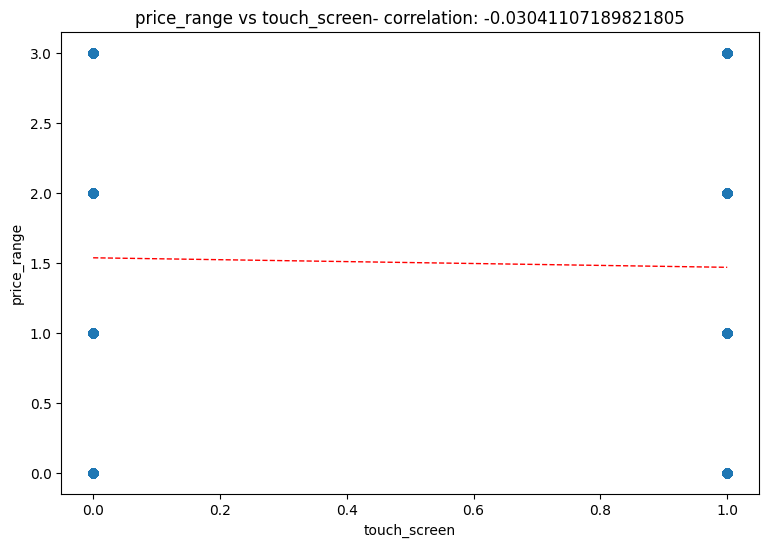

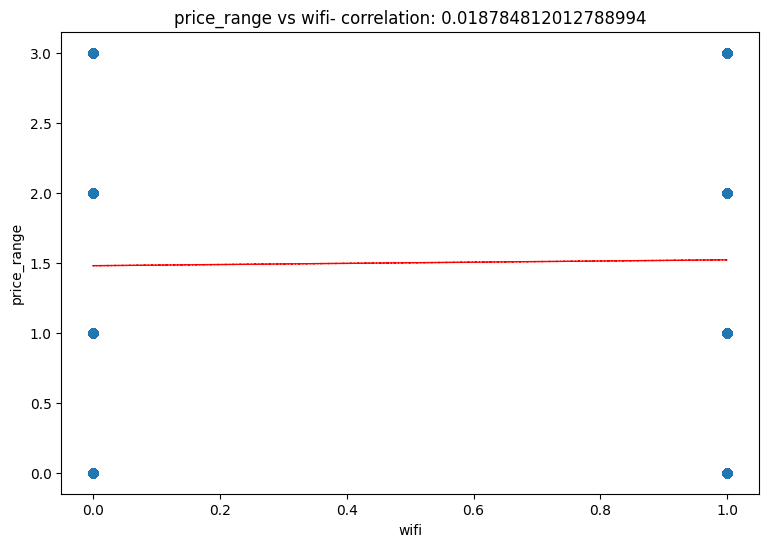

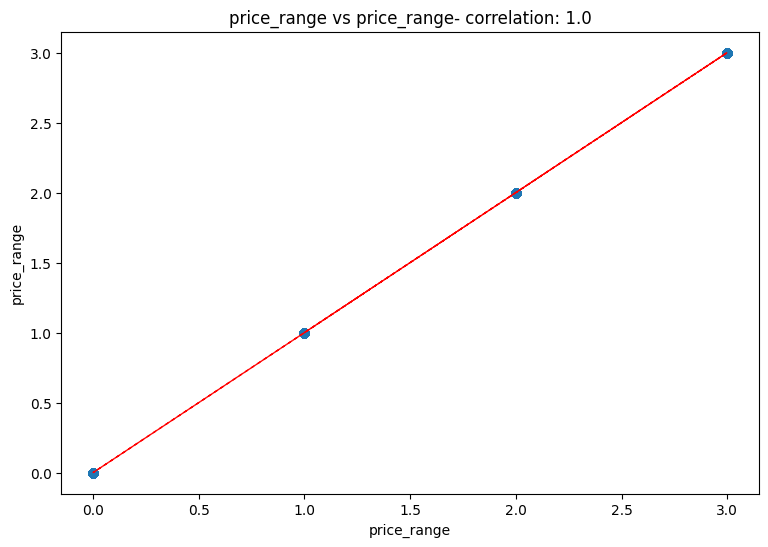

In [ ]:
for col in df.describe().columns:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['price_range']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('price_range')
  ax.set_title('price_range vs ' + col + '- correlation: ' + str(correlation))


  z = np.polyfit(df[col], df['price_range'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, 'r--', lw = 1)

<Axes: xlabel='price_range', ylabel='ram'>

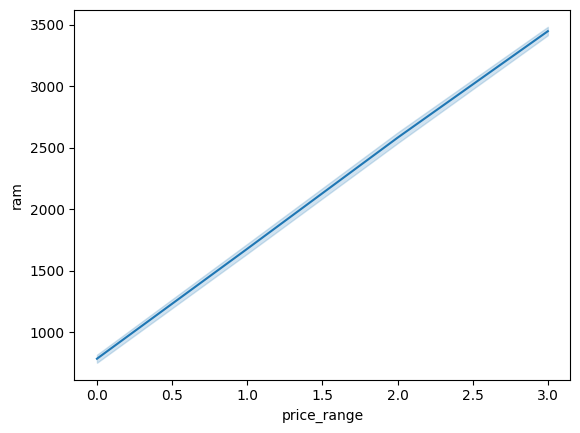

In [ ]:
sns.lineplot(x=df['price_range'],y=df['ram'])

In [ ]:
int_columns_df = df.select_dtypes(include = ['int','float'])
int_columns_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Correlation Heat Map**

In [ ]:
int_columns_df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

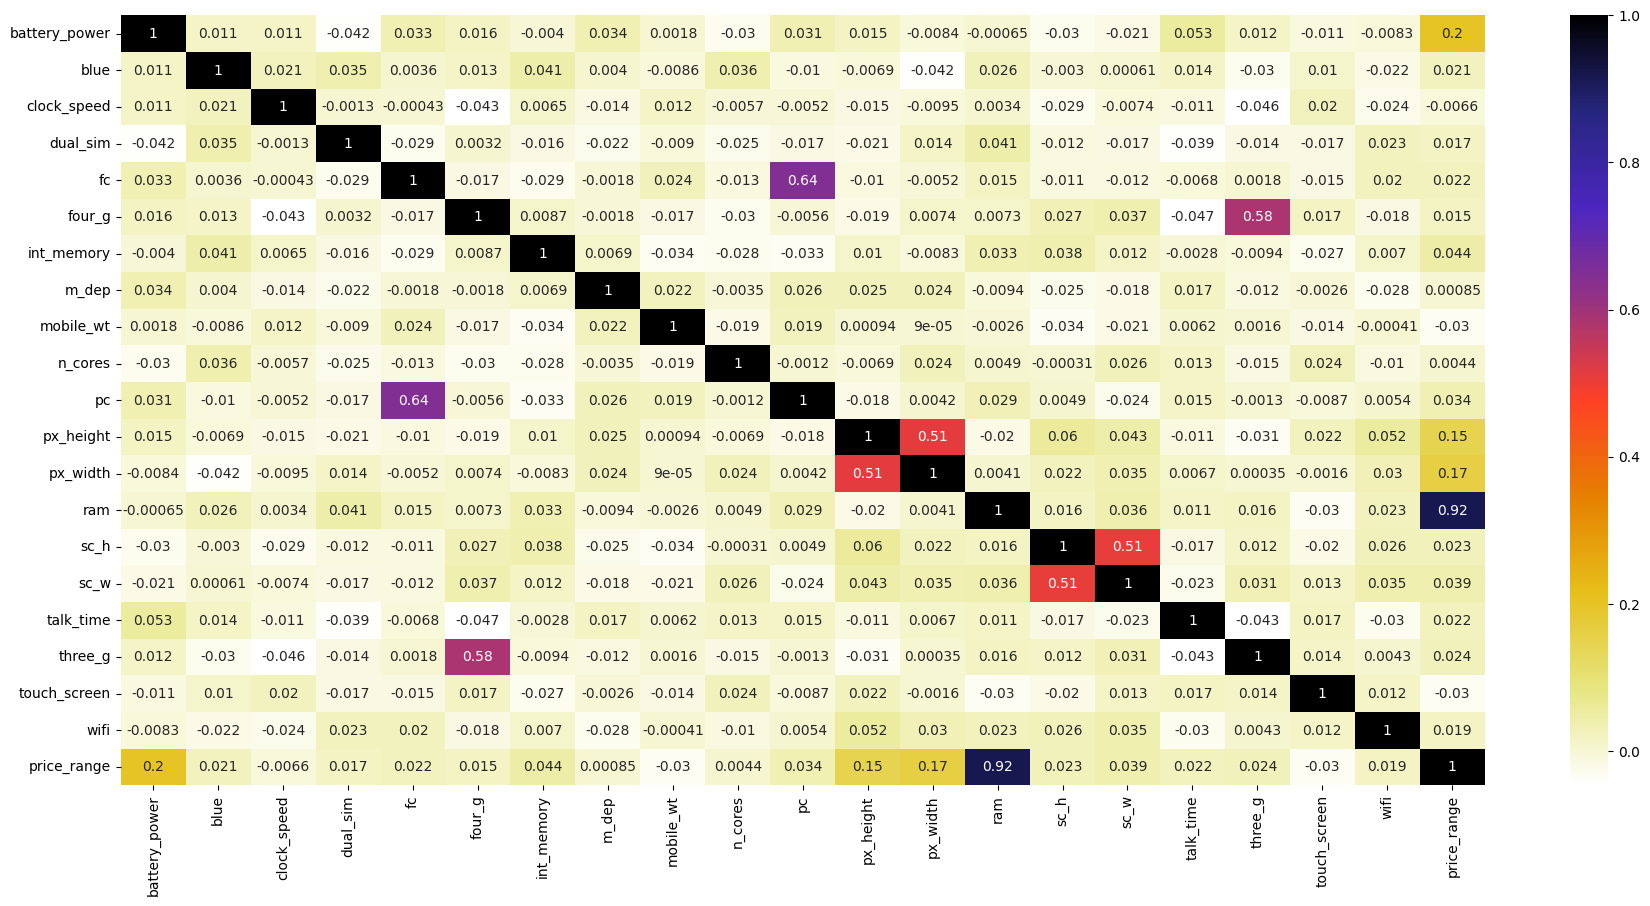

In [ ]:
plt.figure(figsize = (22,10))
sns.heatmap(int_columns_df.corr(), annot = True, cmap = plt.cm.CMRmap_r)

**Feature Engineering**

In [ ]:
df['Pixels_Dimension']=df['px_height']*df['px_width']

In [ ]:
def change(x):
  return x/1000

In [ ]:
df['ram']=df['ram'].apply(change)

In [ ]:
df['Screen Dimension'] = df['sc_h']* df['sc_w']


In [ ]:
df.drop(columns=['sc_h','sc_w','blue'],inplace=True)

In [ ]:
df.drop(columns=['px_height','px_width'],inplace=True)

In [ ]:
df.shape

(2000, 18)

In [ ]:
df.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,Pixels_Dimension,Screen Dimension
0,842,2.2,0,1,0,7,0.6,188,2,2,2.549,19,0,0,1,1,15120,63
1,1021,0.5,1,0,1,53,0.7,136,3,6,2.631,7,1,1,0,2,1799140,51
2,563,0.5,1,2,1,41,0.9,145,5,6,2.603,9,1,1,0,2,2167308,22
3,615,2.5,0,0,0,10,0.8,131,6,9,2.769,11,1,0,0,2,2171776,128
4,1821,1.2,0,13,1,44,0.6,141,2,14,1.411,15,1,1,0,1,1464096,16


In [ ]:
df.columns

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'Pixels_Dimension',
       'Screen Dimension'],
      dtype='object')

In [ ]:
df.shape

(2000, 18)

**Splitting Data into Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price_range']), df['price_range'], test_size = 0.2, random_state = 0)


df.shape, X_train.shape, X_test.shape

((2000, 18), (1600, 17), (400, 17))

**Check Relationship Between Columns By Variance_inflation_factor**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price_range']]])

,variables,VIF
0,battery_power,7.888574
1,clock_speed,4.209148
2,dual_sim,1.990279
3,fc,3.410237
4,four_g,3.187300
5,int_memory,3.871063
6,m_dep,3.872329
7,mobile_wt,12.079792
8,n_cores,4.521440
9,pc,6.164865


In [ ]:
X = df.drop(columns = ['price_range'])
y = df['price_range']
xcol = X.columns

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
yeo = PowerTransformer()
x_train = yeo.fit_transform(x_train)
x_test = yeo.transform(x_test)

# **Model Implementation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

**Decision Tree Algorithm**

In [ ]:
dec =DecisionTreeClassifier()
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.81


**Decision Tree With HyperParameter Tunning**

In [ ]:
param_grid=param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20],
    'min_impurity_decrease': [0, 0.1, 0.2]
}

In [ ]:
pre_dec = DecisionTreeClassifier()
pre_dec = GridSearchCV(pre_dec,param_grid=param_grid,scoring='accuracy',cv=5)
pre_dec.fit(x_train,y_train)
pre_dec_pred = pre_dec.predict(x_test)
pre_dec_accuracy = accuracy_score(pre_dec_pred,y_test)
pre_dec_accuracy

0.806

In [ ]:
pre_dec.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

**Apply Decision Tree with Best Parameters**

In [ ]:
dec =DecisionTreeClassifier(criterion='gini',
 max_depth= 10,
 max_leaf_nodes= 20,
 min_impurity_decrease= 0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_impurity_decrease=0)

In [ ]:
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.806


**Random Forest Classifier**

In [ ]:
rf_tune = RandomForestClassifier(max_depth= 15,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)
rf_tune.fit(x_train,y_train)
rf_tune_pred = rf_tune.predict(x_test)
rf_tune_accuracy = accuracy_score(rf_tune_pred,y_test)
rf_tune_accuracy


0.87

**K Nearest NeighbourClassifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=273,p=1,weights='distance',metric= 'manhattan')

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=273, p=1,
                     weights='distance')

In [ ]:
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(knn_pred,y_test)
knn_accuracy


0.748

**Logistics Regression**

In [ ]:
parameter = {'penalty':['l1', 'l2', 'elasticnet'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'C':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]}

In [ ]:
logi = LogisticRegression()
logi = GridSearchCV(logi,param_grid=parameter,scoring='accuracy',cv=5)

In [ ]:
logi.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [ ]:
logi.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
logi_tune = LogisticRegression(C= 1, penalty= 'l1', solver= 'saga')

In [ ]:
logi_tune.fit(x_train,y_train)
logi_tune_pred = logi_tune.predict(x_test)
logi_tune_accuracy = accuracy_score(logi_tune_pred,y_test)
logi_tune_accuracy

0.932

**Naive Bayes Algorithm**

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(nb_pred,y_test)
nb_accuracy

0.778

**All Model's Accuracy**

In [ ]:
evaluation = pd.DataFrame(data={'Model':['KNN classifier','DecisionTree classifier','LogisticRegression classifier','RandomForest classifier','Naive Bays'], 'accuracy':[knn_accuracy,dec_pred_accuracy,logi_tune_accuracy,rf_tune_accuracy,nb_accuracy]})

In [ ]:
evaluation=evaluation.sort_values(by=['accuracy'],ascending=False).reset_index(drop=True)

In [ ]:
evaluation

,Model,accuracy
0,LogisticRegression classifier,0.932
1,RandomForest classifier,0.870
2,DecisionTree classifier,0.806
3,Naive Bays,0.778
4,KNN classifier,0.748


From All Model Accuracy,We Conclude that Logistic Regression is best model for this dataset

# **Model Explainability**

In [ ]:
!pip install shap

In [ ]:
from shap import force_plot
from shap import TreeExplainer
from shap import summary_plot

In [ ]:
import shap

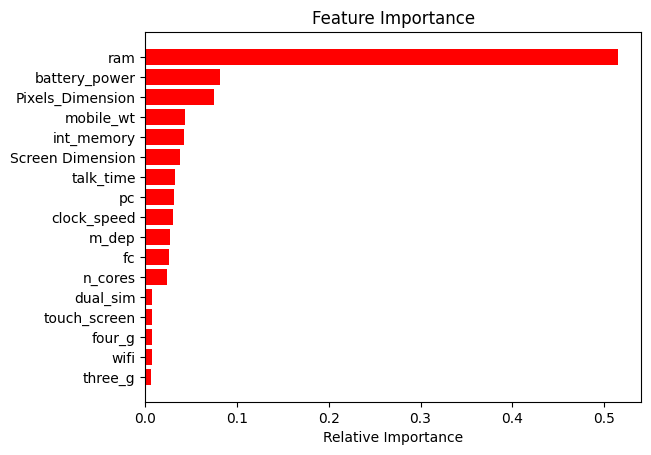

In [ ]:
features = xcol
importances = rf_tune.feature_importances_
indices = np.argsort(importances)


# plot the graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()